In [132]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost as xgb
import tensorflow as tf

In [133]:
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [134]:
dataset=pd.read_csv(r'D:\ML\Ahmad codes\naftshahr_r.csv')

# EDA

In [135]:
dataset.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,...,T172,T173,T174,T175,T176,T177,T178,T179,T180,T181
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.076620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
dataset.shape

(501, 181)

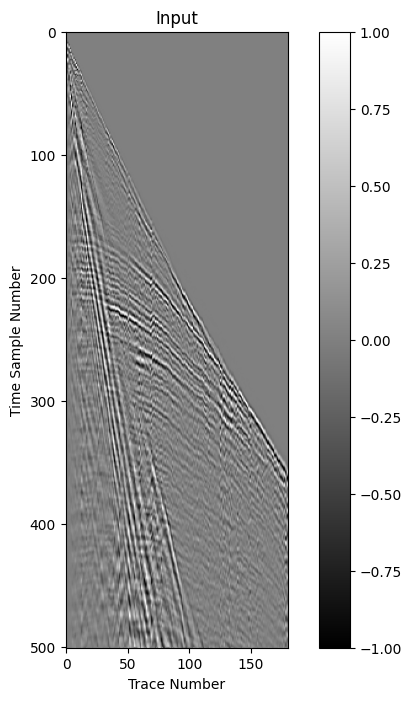

In [137]:
from matplotlib.pyplot import imshow
plt.figure(figsize=(8,8))
imshow(np.asarray(dataset),cmap='gray')
plt.xlabel('Trace Number');plt.ylabel('Time Sample Number');plt.title('Input')
plt.colorbar()
plt.show()

In [138]:
signal=dataset.T30.values

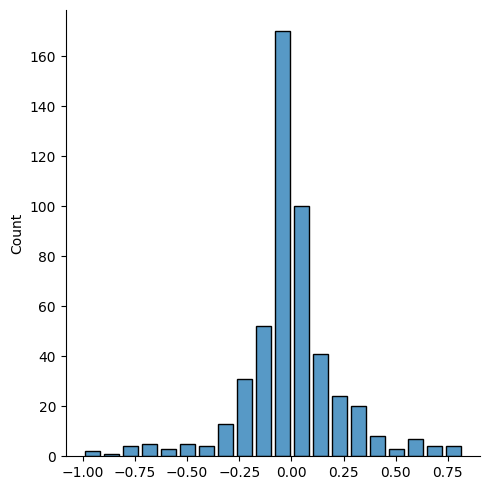

In [139]:
sns.displot(signal, bins=20,shrink=0.8)

Text(0.5, 1.0, 'Signal')

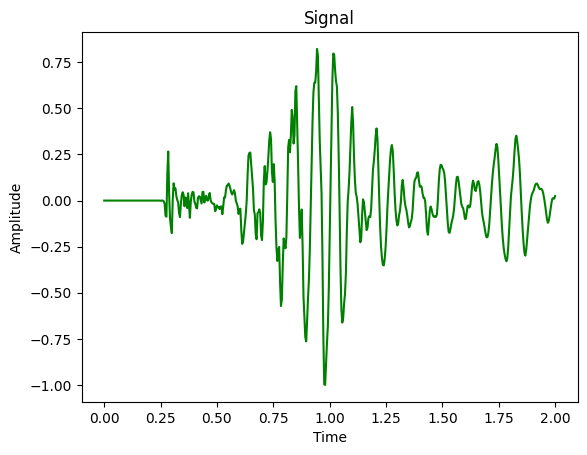

In [140]:
from matplotlib import pyplot 
   
# assigning time values of the signal
# initial time period, final time period and phase angle 
dt=0.004;
signalTime = np.arange(0, dt*dataset.shape[0], dt);
  
# getting the amplitude of the signal
signalAmplitude = signal
  
# plotting the signal 
pyplot.plot(signalTime, signalAmplitude, color ='green')
  
pyplot.xlabel('Time')
pyplot.ylabel('Amplitude')
pyplot.title("Signal")


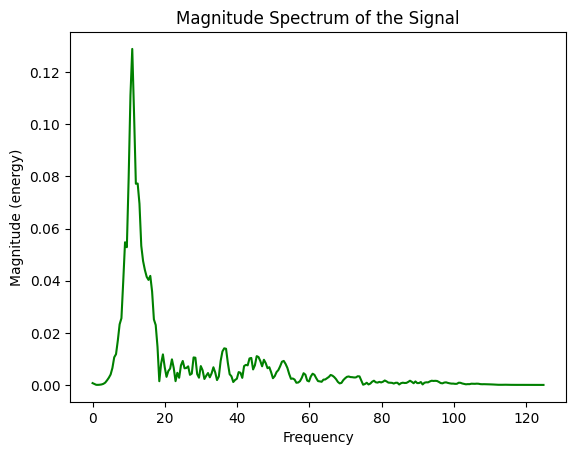

In [141]:
# plotting the magnitude spectrum of the signal 
pyplot.magnitude_spectrum(signalAmplitude,Fs=1/dt, color ='green')
  
pyplot.title("Magnitude Spectrum of the Signal")
pyplot.show()  

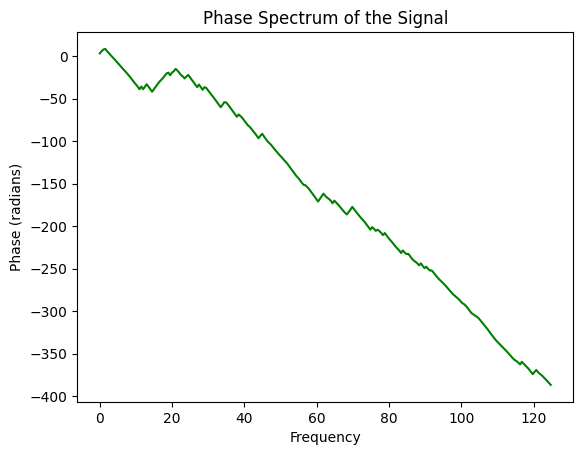

In [142]:
# plotting the phase spectrum of the signal 
pyplot.phase_spectrum(signalAmplitude,Fs=1/dt, color ='green')
  
pyplot.title("Phase Spectrum of the Signal")
pyplot.show()

# Hilbert transform, envelope, CosinePhase, InsFreq

In [143]:
from scipy.signal import hilbert, chirp
 
analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
fs=1/dt
instantaneous_frequency = (np.diff(instantaneous_phase) /(2.0*np.pi) * fs)

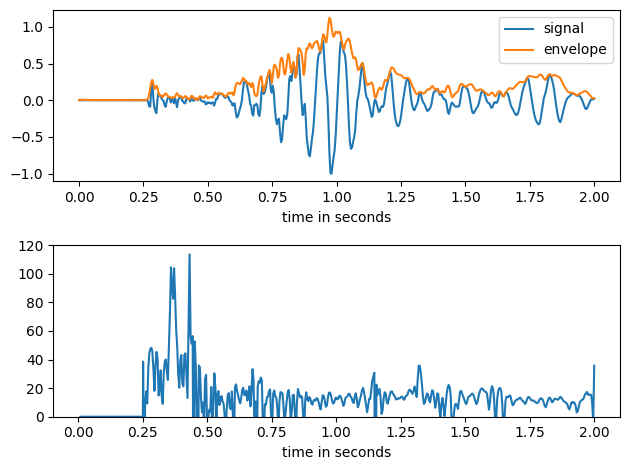

In [144]:
fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.plot(signalTime, signal, label='signal')
ax0.plot(signalTime, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax1.plot(signalTime[1:], instantaneous_frequency)
ax1.set_xlabel("time in seconds")
ax1.set_ylim(0.0, 120.0)
fig.tight_layout()

In [145]:
Envlope_data=np.zeros((dataset.shape[0], dataset.shape[1]))
Phase_data=np.zeros((dataset.shape[0], dataset.shape[1]))
InsFreq_data=np.zeros((dataset.shape[0], dataset.shape[1]))

fs=1/dt
for i in range(0,dataset.shape[1]-1):
    temp=dataset.iloc[:,i].values
    analytic_signal_temp = hilbert(temp)
    amplitude_envelope_temp = np.abs(analytic_signal_temp)
    instantaneous_phase_temp = np.unwrap(np.angle(analytic_signal_temp))
    Envlope_data[:,i]=amplitude_envelope_temp
    Phase_data[:,i]=instantaneous_phase_temp
  

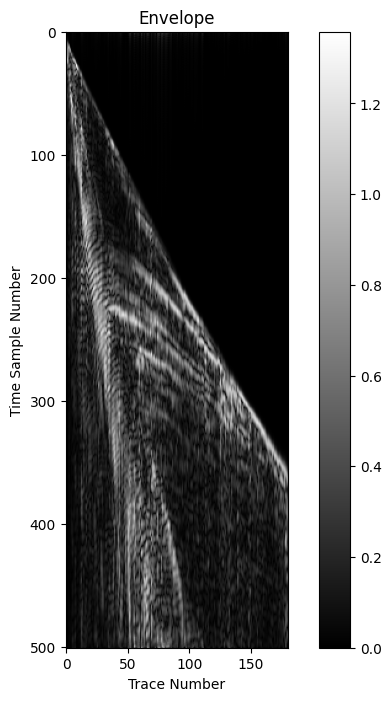

In [146]:
plt.figure(figsize=(8,8))
imshow(np.asarray(Envlope_data),cmap='gray')
plt.xlabel('Trace Number');plt.ylabel('Time Sample Number');plt.title('Envelope')
plt.colorbar()
plt.show()

# Apply Band pass filters

In [147]:
from scipy.signal import butter, cheby1, filtfilt

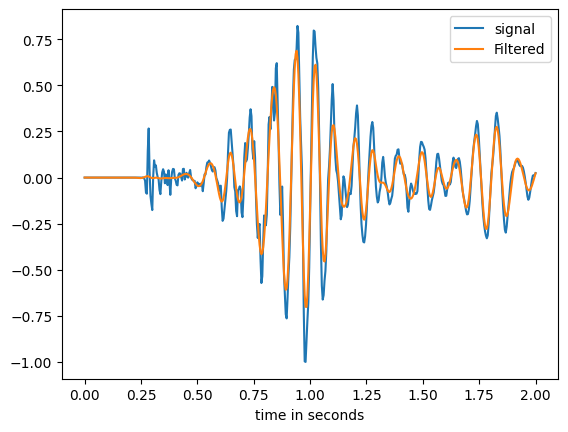

In [148]:
# lowpass
order = 3
Wn = 15  # in Hz
btype = 'lowpass'
fs = 1/dt  # in Hz
b, a = butter(order, Wn, btype, fs = fs)
data_butter = filtfilt(b, a, signal)
plt.plot(signalTime, signal, label='signal')
plt.plot(signalTime, data_butter, label='Filtered')
plt.xlabel("time in seconds")
plt.legend()

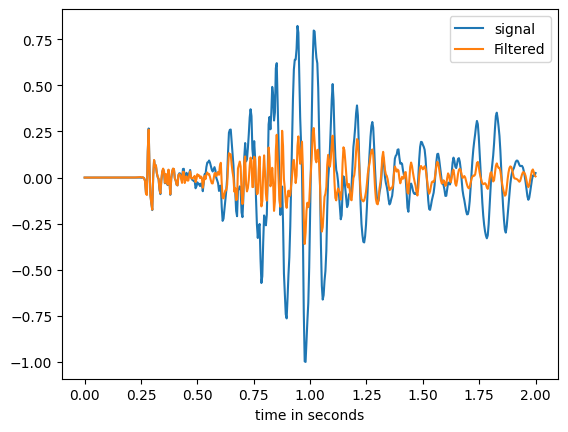

In [149]:
# HighPass
order = 3
Wn = 15  # in Hz
btype = 'highpass'
fs = 1/dt  # in Hz
b, a = butter(order, Wn, btype, fs = fs)
data_butter = filtfilt(b, a, signal)
plt.plot(signalTime, signal, label='signal')
plt.plot(signalTime, data_butter, label='Filtered')
plt.xlabel("time in seconds")
plt.legend()

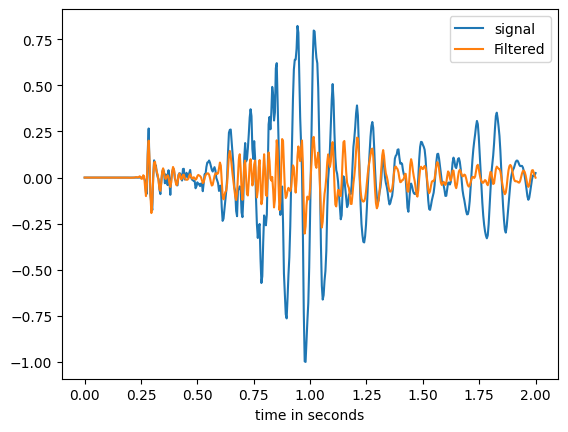

In [150]:
# BandPass
order = 3
Wn = [15,60]  # in Hz
btype = 'bandpass'
fs = 1/dt  # in Hz
b, a = butter(order, Wn, btype, fs = fs)
data_butter = filtfilt(b, a, signal)
plt.plot(signalTime, signal, label='signal')
plt.plot(signalTime, data_butter, label='Filtered')
plt.xlabel("time in seconds")
plt.legend()

# Apply band pass on whole matrix

In [151]:
filtered_data=np.zeros((dataset.shape[0], dataset.shape[1]))
order = 3
Wn = [15,70]  # in Hz
btype = 'bandpass'
fs = 1/dt  # in Hz
b, a = butter(order, Wn, btype, fs = fs)

for i in range(0,dataset.shape[1]-1):
    temp=dataset.iloc[:,i].values
    data_butter = filtfilt(b, a, temp)
    filtered_data[:,i]=data_butter
    

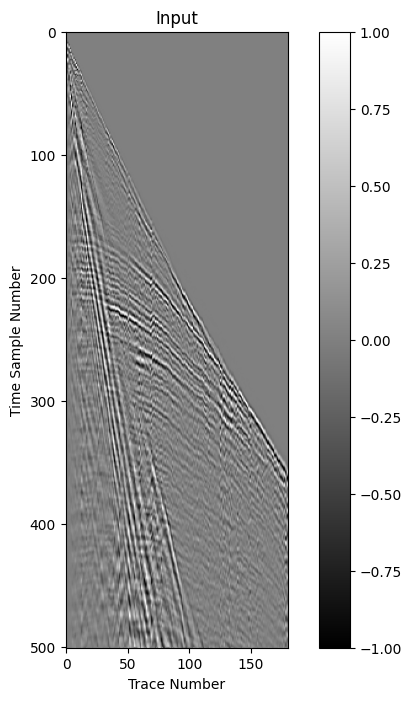

In [152]:
plt.figure(figsize=(8,8))
imshow(np.asarray(dataset),cmap='gray')
plt.xlabel('Trace Number');plt.ylabel('Time Sample Number');plt.title('Input')
plt.colorbar()
plt.show()

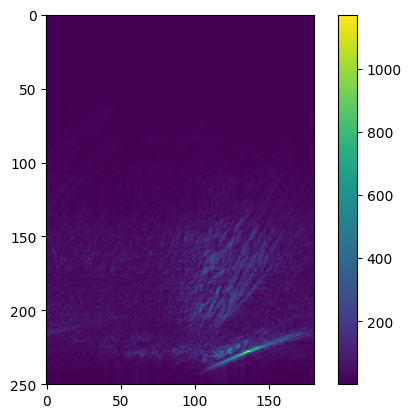

In [153]:
# Calculate Fourier transform of grating
ft = np.fft.ifftshift(dataset)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)
plt.imshow(abs(ft))
plt.ylim([250, 0])  # Note, order is reversed for y
plt.colorbar()
plt.show()

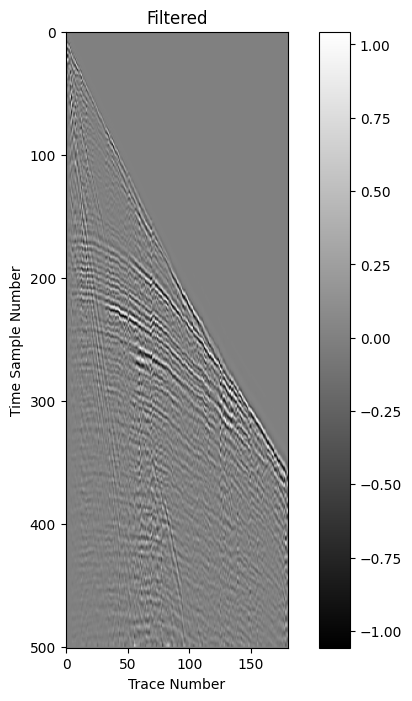

In [154]:
plt.figure(figsize=(8,8))
imshow(np.asarray(filtered_data),cmap='gray')
plt.xlabel('Trace Number');plt.ylabel('Time Sample Number');plt.title('Filtered')
plt.colorbar()
plt.show()

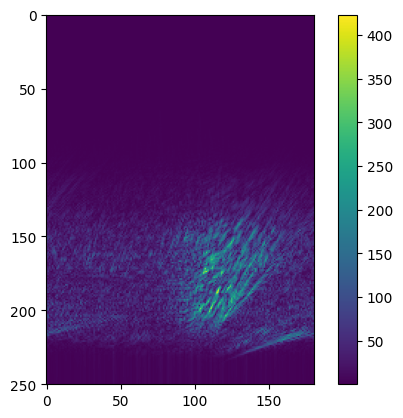

In [155]:
# Calculate Fourier transform of grating
ft = np.fft.ifftshift(filtered_data)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)
plt.imshow(abs(ft))
plt.ylim([250, 0])  # Note, order is reversed for y
plt.colorbar()
plt.show()

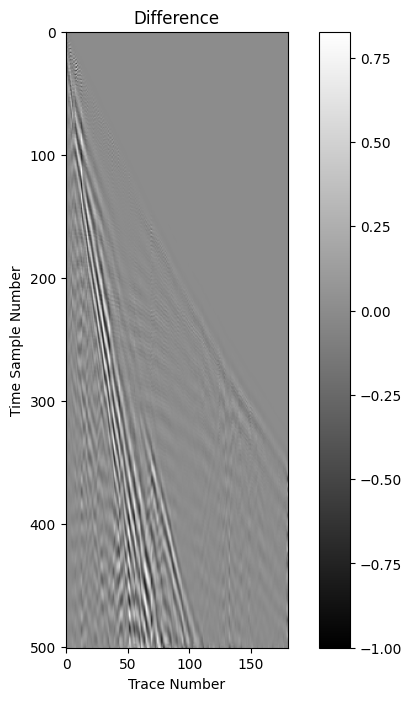

In [156]:
difference=np.asarray(dataset)-filtered_data
plt.figure(figsize=(8,8))
imshow(difference,cmap='gray')
plt.xlabel('Trace Number');plt.ylabel('Time Sample Number');plt.title('Difference')
plt.colorbar()
plt.show()


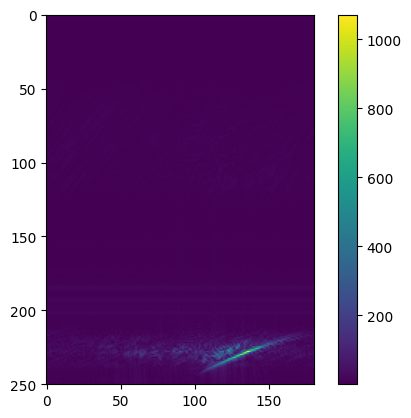

In [157]:
# Calculate Fourier transform of grating
ft = np.fft.ifftshift(difference)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)
plt.imshow(abs(ft))
plt.ylim([250, 0])  # Note, order is reversed for y
plt.colorbar()
plt.show()